In [73]:
from pydataset import data
import io
from helper_functions import df_print_metadata
from helper_functions import df_peek
from helper_functions import df_print_summary
from helper_functions import series_is_whole_nums
from helper_functions import df_print_missing_vals
from helper_functions import df_percent_missing_vals

from helper_functions import evaluate_model_train
from helper_functions import df_print_r_and_p_values

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression

In [40]:
df = data('swiss')

In [41]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [42]:
df_print_missing_vals(df)


Missing Values:

No missing values


In [43]:
target = df.Fertility
target

Courtelary      80.2
Delemont        83.1
Franches-Mnt    92.5
Moutier         85.8
Neuveville      76.9
Porrentruy      76.1
Broye           83.8
Glane           92.4
Gruyere         82.4
Sarine          82.9
Veveyse         87.1
Aigle           64.1
Aubonne         66.9
Avenches        68.9
Cossonay        61.7
Echallens       68.3
Grandson        71.7
Lausanne        55.7
La Vallee       54.3
Lavaux          65.1
Morges          65.5
Moudon          65.0
Nyone           56.6
Orbe            57.4
Oron            72.5
Payerne         74.2
Paysd'enhaut    72.0
Rolle           60.5
Vevey           58.3
Yverdon         65.4
Conthey         75.5
Entremont       69.3
Herens          77.3
Martigwy        70.5
Monthey         79.4
St Maurice      65.0
Sierre          92.2
Sion            79.3
Boudry          70.4
La Chauxdfnd    65.7
Le Locle        72.7
Neuchatel       64.4
Val de Ruz      77.6
ValdeTravers    67.6
V. De Geneve    35.0
Rive Droite     44.7
Rive Gauche     42.8
Name: Fertili

In [44]:
x_vars = df.drop(columns=['Fertility'])
x_vars

,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,17.0,15,12,9.96,22.2
Delemont,45.1,6,9,84.84,22.2
Franches-Mnt,39.7,5,5,93.40,20.2
Moutier,36.5,12,7,33.77,20.3
Neuveville,43.5,17,15,5.16,20.6
Porrentruy,35.3,9,7,90.57,26.6
Broye,70.2,16,7,92.85,23.6
Glane,67.8,14,8,97.16,24.9
Gruyere,53.3,12,7,97.67,21.0
Sarine,45.2,16,13,91.38,24.4


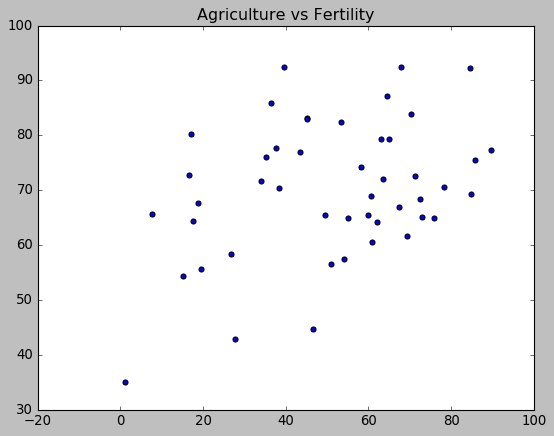

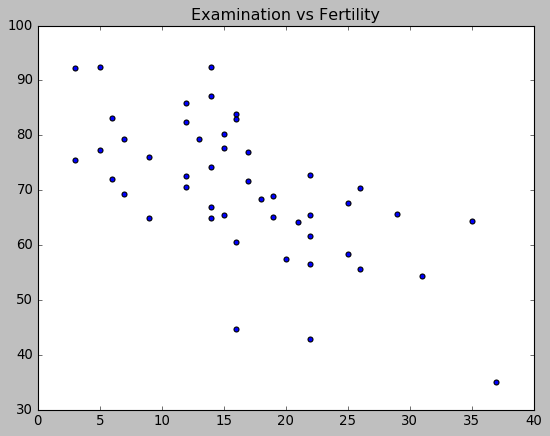

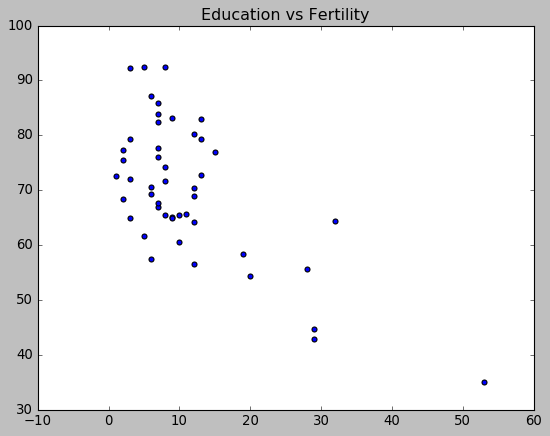

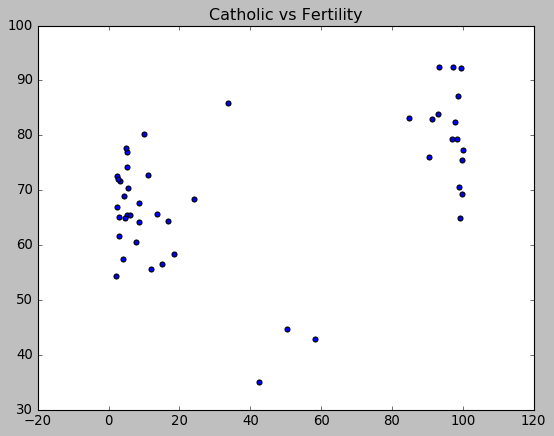

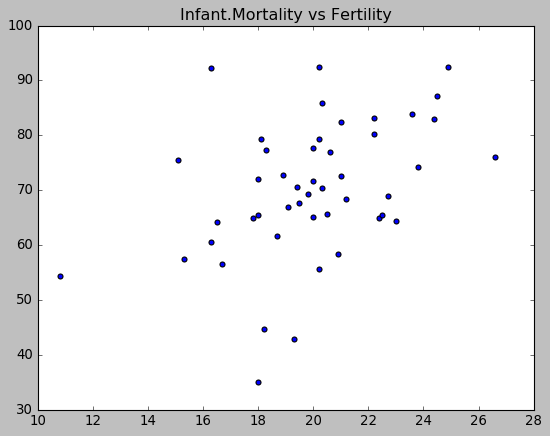

In [45]:
for var in x_vars:
    plt.scatter(x=var, y=df.Fertility, data=df)
    plt.title(var+' vs Fertility')
    plt.show()

In [46]:
df_print_summary(df)

SUMMARY
Description:
       Fertility  Agriculture  Examination  Education   Catholic  \
count  47.000000    47.000000    47.000000  47.000000   47.00000   
mean   70.142553    50.659574    16.489362  10.978723   41.14383   
std    12.491697    22.711218     7.977883   9.615407   41.70485   
min    35.000000     1.200000     3.000000   1.000000    2.15000   
25%    64.700000    35.900000    12.000000   6.000000    5.19500   
50%    70.400000    54.100000    16.000000   8.000000   15.14000   
75%    78.450000    67.650000    22.000000  12.000000   93.12500   
max    92.500000    89.700000    37.000000  53.000000  100.00000   

       Infant.Mortality  
count         47.000000  
mean          19.942553  
std            2.912697  
min           10.800000  
25%           18.150000  
50%           20.000000  
75%           21.700000  
max           26.600000  

IQR:
	Fertility: 13.749999999999986
	Agriculture: 31.750000000000007
	Examination: 10.0
	Education: 6.0
	Catholic: 87.93
	Infant.Mo

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x_vars, target, train_size=.80, random_state=123)

In [98]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Train dimensions (rows, columns): (37, 6)


In [99]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Test dimensions (rows, columns): (10, 6)


In [100]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [101]:
lm1.fit(X_train[['Agriculture', 'Catholic']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [102]:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

63.55879683763795
[0.03743266 0.12533438]


In [103]:
print('Multivariate - final_exam = b + m1 * agriculture + m2 * catholic')
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0])
print('    coefficient (m2): %.2f' % lm1_coefficients[1])


Multivariate - final_exam = b + m1 * agriculture + m2 * catholic
    y-intercept  (b): 63.56
    coefficient (m1): 0.04
    coefficient (m2): 0.13


In [104]:
y_pred_lm1 = lm1.predict(X_train[['Agriculture', 'Catholic']])
y_pred_lm1

array([77.82386708, 66.25662675, 66.3861906 , 66.37001042, 66.52480473,
       79.19135766, 66.1878478 , 66.80228399, 69.30950002, 65.57538947,
       78.27421989, 66.45276871, 71.90643612, 69.15763106, 66.11030814,
       66.33826942, 79.27135371, 65.24511073, 65.44348251, 65.83384295,
       66.17625323, 66.50632311, 65.59017404, 66.38913319, 78.81555977,
       78.05692605, 76.70380905, 79.44994479, 78.88912145, 67.36168179,
       66.64733064, 65.80278982, 65.70059021, 78.29851963, 66.87566484,
       76.75110487, 71.62377175])

In [105]:
y_label = lm1_y_intercept
x_label = lm1_coefficients[0]

print("Model Evaluation on TRAIN Data")
mse = mean_squared_error(y_train, y_pred_lm1)
print(f"\tMSE: {mse:.3f}")

mae = median_absolute_error(y_train, y_pred_lm1)
print(f"\tMAE: {mae:.3f}")

r2 = r2_score(y_train, y_pred_lm1)
print(
        f"\t{r2:.2%} of the variance in {y_label} can be explained by {x_label}."
    )
print()

print("P-VALUE")
f_vals, p_vals = f_regression(X_train, y_pred_lm1)
print(f"\tTrain: {p_vals[0]:.3}")
print()


Model Evaluation on TRAIN Data
	MSE: 104.157
	MAE: 6.196
	22.16% of the variance in 63.55879683763795 can be explained by 0.03743265966462249.

P-VALUE
	Train: 0.000621



In [106]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [107]:
lm2.fit(X_train[['Education', 'Examination']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [108]:
lm2_y_intercept = lm2.intercept_
print(lm1_y_intercept)

lm2_coefficients = lm2.coef_
print(lm1_coefficients)

63.55879683763795
[0.03743266 0.12533438]


In [109]:
print('Multivariate - final_exam = b + m1 * education + m2 * examination')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0])
print('    coefficient (m2): %.2f' % lm2_coefficients[1])


Multivariate - final_exam = b + m1 * education + m2 * examination
    y-intercept  (b): 83.87
    coefficient (m1): -0.50
    coefficient (m2): -0.52


In [110]:
y_pred_lm2 = lm2.predict(X_train[['Education', 'Examination']])
y_pred_lm2

array([72.00854431, 79.23762228, 67.95309594, 73.05715465, 77.08480443,
       80.81053778, 75.04318094, 70.51902459, 73.44246685, 63.20655085,
       72.56064807, 67.37319359, 57.93956868, 74.10576498, 70.40783022,
       49.63408179, 81.30704436, 70.98773257, 70.05031661, 67.51218655,
       72.03634291, 69.85572646, 65.88367387, 72.56064807, 74.68566734,
       70.60242037, 69.02950487, 80.25843402, 74.60227156, 66.38018044,
       69.44261566, 56.33885459, 64.28295977, 78.71331711, 61.33171892,
       78.7689143 , 61.08539968])

In [111]:
y_label = lm2_y_intercept
x_label = lm2_coefficients[0]

print("Model Evaluation on TRAIN Data")
mse = mean_squared_error(y_train, y_pred_lm2)
print(f"\tMSE: {mse:.3f}")

mae = median_absolute_error(y_train, y_pred_lm2)
print(f"\tMAE: {mae:.3f}")

r2 = r2_score(y_train, y_pred_lm2)
print(
        f"\t{r2:.2%} of the variance in {y_label} can be explained by {x_label}."
    )
print()

print("P-VALUE")
f_vals, p_vals = f_regression(X_train, y_pred_lm2)
print(f"\tTrain: {p_vals[0]:.3}")
print()


Model Evaluation on TRAIN Data
	MSE: 85.317
	MAE: 7.238
	36.24% of the variance in 83.87297300657721 can be explained by -0.49650657409966864.

P-VALUE
	Train: 5.53e-07



In [112]:
y_pred_lm2 = lm2.predict(X_test[['Education', 'Examination']])
y_pred_lm2

array([74.10576498, 66.90448561, 38.1588334 , 57.68938134, 67.28979781,
       77.22379739, 72.53284948, 73.55366122, 75.67868048, 76.25858284])

Text(0, 0.5, 'Residuals')

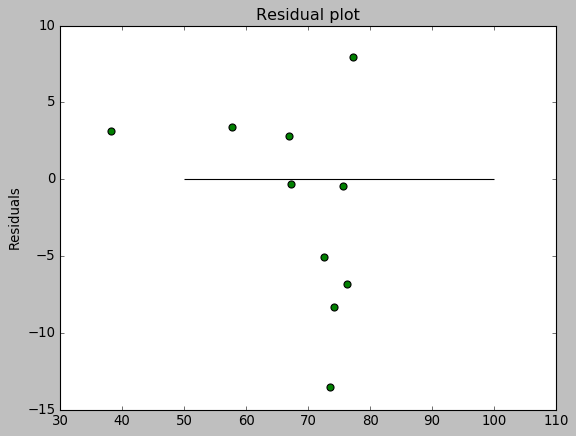

In [113]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [114]:
lm_ev = LinearRegression().fit(train.drop(columns='Fertility'), train.Fertility)

predicted = lm_ev.predict(train.drop(columns='Fertility'))
actual = train.Fertility

mean_squared_error(actual, predicted)

43.287927652783004

In [115]:
lm_ev.coef_

array([-0.21156852, -0.39409426, -0.92225189,  0.12007924,  1.68540012])

### These coefficients are like the weights of the variables

In [116]:
list(zip(train.drop(columns='Fertility').columns, lm_ev.coef_))

[('Agriculture', -0.21156851702423102),
 ('Examination', -0.3940942577543836),
 ('Education', -0.9222518920217094),
 ('Catholic', 0.12007923932536471),
 ('Infant.Mortality', 1.685400116534878)]

### Coefficients: For a linear regression model, which variables have the most impact on the target variable. 

In [117]:
train.corr()

,Agriculture,Examination,Education,Catholic,Infant.Mortality,Fertility
Agriculture,1.000000,-0.662716,-0.643332,0.419195,-0.274139,0.252493
Examination,-0.662716,1.000000,0.651531,-0.568851,0.244401,-0.545232
Education,-0.643332,0.651531,1.000000,-0.151481,0.135395,-0.548811
Catholic,0.419195,-0.568851,-0.151481,1.000000,-0.065221,0.466533
Infant.Mortality,-0.274139,0.244401,0.135395,-0.065221,1.000000,0.290055
Fertility,0.252493,-0.545232,-0.548811,0.466533,0.290055,1.000000


### Correlation is the correlation of one variable with another variable; how the variables interact -- only two variables at a time.

### However, the coefficients tell us how those variables interact all at one time.